# HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount 
of time and money to hire and nuture their employees. It is a huge loss for companies if employees 
leave, especially the key resources. So if HR can predict weather employees are at risk for leaving 
the company, it will allow them to identify the attrition risks and help understand and provie necessary 
support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

# Why are our best and most experienced employees leaving prematurely?

Fields in the dataset include:

1. Employee satisfaction level
2. Last evaluation
3. Number of projects
4. Average monthly hours
5. Time spent at the company
6. Whether they have had a work accident
7. Whether they have had a promotion in the last 5 years
8. Department
9. Salary
10. Whether the employee has left

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [2]:
hr_df = pd.read_csv( 'HR_Perf.csv' )

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Predict employees who are going to leave the organization by using Logistic Regression model
1. Separate data into train and test sets ( 70:30). Use random seed as 7 
2. Calculate train and test accuracies
3. Print 'Confusion Matrix'
4. Calculate Precision and Recall
5. Calculate ROC-AUC

In [18]:
## removes first column for each categoricl value alphbeticaly (here 10 columns dropped)
data_complete = pd.get_dummies(hr_df, drop_first=True) 
data_complete.shape

(14999, 19)

In [19]:
data_complete.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [21]:
X = data_complete.drop("left", axis=1)
y = data_complete["left"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
#y_predictProb = model.predict_proba(X_test)
#fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
#roc_auc = auc(fpr,tpr)

In [56]:
def classRegModel(model, X_test, y_test):
    optimalThreshold = 0
    optimalF1 = 0
    optimalRecall = 0
    optimalPrecision = 0
    optimalAccuracy = 0
    y_predictProb = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
    roc_auc = auc(fpr,tpr)
    for threshold in thresholds:
        preds = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        accuracy = accuracy_score(y_test, preds)
        recall = recall_score(y_test, preds)
        precision = precision_score(y_test, preds)
        F1 = 2*(precision*recall)/(precision + recall)
        if(F1 > optimalF1):
            optimalThreshold = threshold
            optimalF1 = F1
            optimalRecall = recall
            optimalPrecision = precision
            optimalAccuracy = accuracy
            y_predict = np.where(model.predict_proba(X_test)[:,1] > optimalThreshold, 1, 0)
    return((optimalThreshold, optimalF1, optimalRecall, optimalPrecision, optimalAccuracy))

In [57]:
classRegModel(model, X_test, y_test)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import

(0.3150411892905548,
 0.5842696629213484,
 0.6679352997145576,
 0.5192307692307693,
 0.778)

In [60]:
# train accuracies , recal and precision
THRESHOLD = 0.3150411892905548
preds = np.where(model.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_train, preds), 
                   recall_score(y_train, preds),
                   precision_score(y_train, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.788932
recall,0.676587
precision,0.548938


In [62]:
# test accuracies , recal and precision
THRESHOLD = 0.3150411892905548
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.778000
recall,0.667935
precision,0.519231


In [66]:
# Print 'Confusion Matrix'
metrics.confusion_matrix(y_test, y_predict)

array([[2799,  650],
       [ 349,  702]], dtype=int64)

In [67]:
# Calculate ROC-AUC
roc_auc

0.8117881353383914

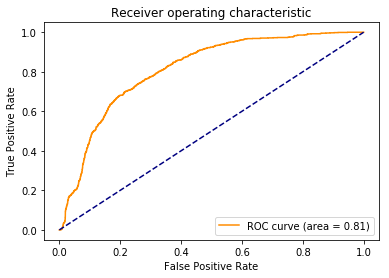

In [70]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Build a model with better than 90% accuracy

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [ ]:
Rf_model = RandomForestClassifier(criterion='entropy',random_state=0 )
model = LogisticRegression()
model.fit(X_train, y_train)